#EECS 442/504 PS1: Filtering

__Please provide the following information__
(e.g. Andrew Owens, ahowens):

[Javier] [Salazar Cavazos], [javiersc]

__Important__: 
1. after you download the .ipynb file, please name it as __your_uniquename_your_umid.ipynb__ before you submit it to canvas. Example: adam_01101100.ipynb. 
2. Please convert the your Colab notebook to a PDF file and submit the PDF file to Gradescope. You can follow [this](https://docs.google.com/document/d/1FvAuB-7NW6jZ8XzSQfkILOAQBdL7mGAXVln8a2ns2Gw/edit?usp=sharing) instructions. For your convenience, we have included the PDF conversion script at the end of this notebook.  




# Introduction

We'll provide you with starter code, like this, in a Jupyter notebook for most problem sets. Please fill in the code to complete the assignment, and submit your notebook to Canvas as a .ipynb file. You can, of course, initially write your code offline in an editor like Emacs or Vim -- we'd just like the final output to be in a notebook format to make grading more consistent. You can also host your notebook locally.

Please note that *we won't run your code*. The notebook you submit should already contain all of the results we ask for. In particular, the visualizations of edge responses and blurred images should be computed *before you submit*.  Also, please do not include long, unnecessary outputs (a few print statements and visualizations are fine, but pages of debugging messages make grading difficult).



# First steps

Run the following code to import the modules that you'll need, and to download the images. You are welcome to modify this code (e.g. by importing more modules).

In [1]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, urllib, os
import scipy.ndimage # For image filtering
import imageio # For loading images
import urllib.request

# Download the images that you'll need
base_url = 'https://web.eecs.umich.edu/~ahowens/eecs442/fa20/psets/ps1/ims'
for name in ['dog-1.jpg', 'dog-2.jpg', 'apple.jpg']:
  with open(name, 'wb') as out:
    url = os.path.join(base_url, name)
    out.write(urllib.request.urlopen(url).read())



# Problem 1.2: Pet edge detection (a)

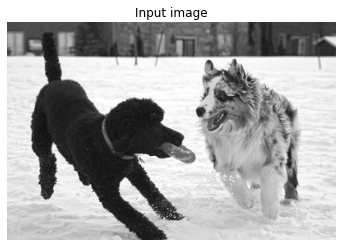

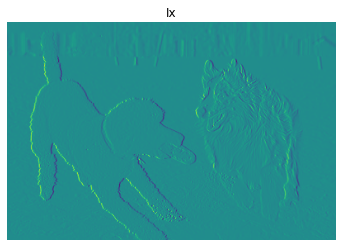

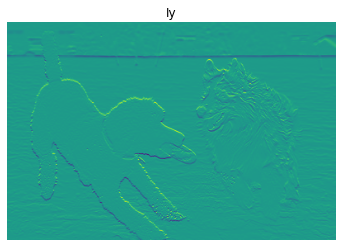

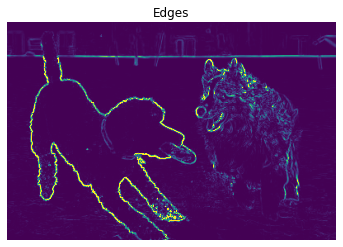

In [2]:
# You can upload images yourself or load them from URLs
im = imageio.v2.imread('dog-1.jpg')
# Convert to grayscale. We'll use floats in [0, 1].
im = im.mean(2)/255.

# Your code here!
######################### Solution code #########################
def zeropad(imageFilter):
    m,n = imageFilter.shape
    if (m==n):
        return imageFilter
    else:
        if m > n: 
            return np.pad(imageFilter, ((0,0),(0,m-1)), 'constant')
        else:
            return np.pad(imageFilter, ((0,n-1),(0,0)), 'constant')

def convolve(im, imageFilter):
    filt = zeropad(imageFilter)
    y,x = im.shape
    ky, kx = filt.shape
    y = y-ky+1
    x = x-kx+1
    f = np.zeros([y,x])
    for i in range(y):
        for j in range(x):
               f[i,j] = np.sum(im[i:i+ky, j:j+kx]*filt)
    return f
            
######################### End solution code #########################

# Convolve the image with horizontal and vertical gradient filters
dx = np.array([[1,-1]])
dy = np.array([[1],[-1]])
Ix = convolve(im, dx)
Iy = convolve(im, dy)
edges = Ix**2. + Iy**2.

# Visualize edge maps using matplotlib
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.axis('off')
plt.title('Ix')
plt.imshow(Ix)

plt.figure()
plt.title('Iy')
plt.axis('off')
plt.imshow(Iy)

plt.figure()
plt.title('Edges')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))


# Problem 1.2: Pet edge detection (c)

Please visualize the images and edges with matplotlib, using code similar to what we provided in (a).

In [3]:
def blurryImage(image):
    gauss = np.zeros([11,11])
    bias = 5
    v = 4
    for i in range(11):
        for j in range(11):
            gauss[i,j] = (1/(2*np.pi*v))*np.exp(-((i-bias)**2 + (j-bias)**2)/(2*v))
    box = np.ones([11,11])*(1/(11**2))
    gImage = scipy.ndimage.convolve(image,gauss)
    bImage = scipy.ndimage.convolve(image,box)
    return gImage, bImage

def GaussianFilter(image, filt):
    gauss = np.zeros([11,11])
    bias = 5
    v = 4
    for i in range(11):
        for j in range(11):
            gauss[i,j] = (1/(2*np.pi*v))*np.exp(-((i-bias)**2 + (j-bias)**2)/(2*v))
    output = scipy.ndimage.convolve(image,gauss)
    output = scipy.ndimage.convolve(output,filt)
    return output

def BoxFilter(image, filt):
    box = np.ones([11,11])*(1/(11**2))
    output = scipy.ndimage.convolve(image,box)
    output = scipy.ndimage.convolve(output,filt)
    return output

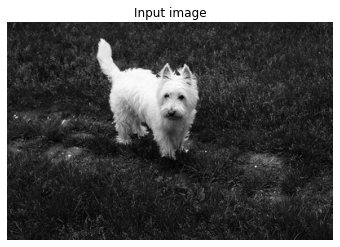

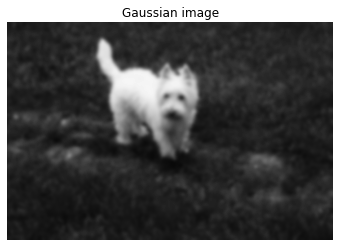

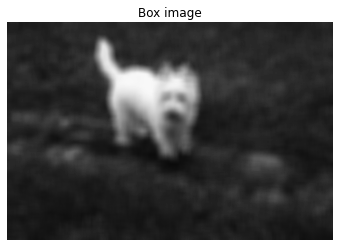

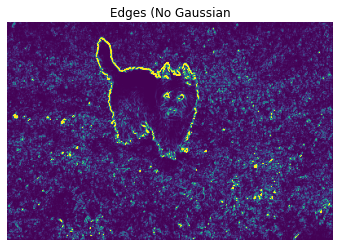

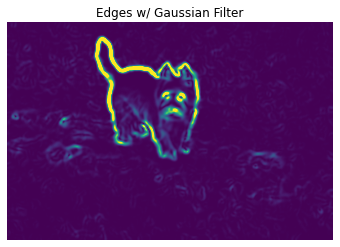

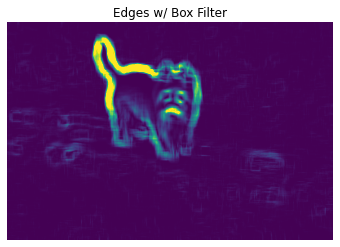

In [4]:
im = imageio.v2.imread('dog-2.jpg').mean(2)/255.

# Your code here!
######################### Solution code #########################
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

guassianImage, boxImage = blurryImage(im)

plt.figure()
plt.title('Gaussian image')
plt.axis('off')
plt.imshow(guassianImage, cmap = 'gray', vmin = 0, vmax = 1)
plt.figure()
plt.title('Box image')
plt.axis('off')
plt.imshow(boxImage, cmap = 'gray', vmin = 0, vmax = 1)


Ix = scipy.ndimage.convolve(im,[[1,-1]])
Iy = scipy.ndimage.convolve(im,[[1],[-1]])
edges = Ix**2. + Iy**2.
plt.figure()
plt.title('Edges (No Gaussian')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))

Ix = GaussianFilter(im, [[1,-1]])
Iy = GaussianFilter(im, [[1],[-1]])
edges = Ix**2. + Iy**2.
plt.figure()
plt.title('Edges w/ Gaussian Filter')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))

Ix = BoxFilter(im, [[1,-1]])
Iy = BoxFilter(im, [[1],[-1]])
edges = Ix**2. + Iy**2.
plt.figure()
plt.title('Edges w/ Box Filter')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))



######################### End solution code #########################

# Problem 1.2: Pet edge detection (d)

Please use the visualization code to display the filter you construct.

225.9286341752889
0.0016300251896838136


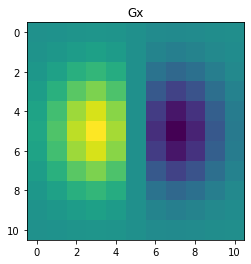

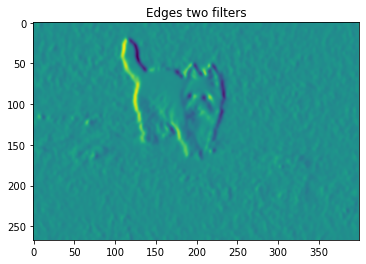

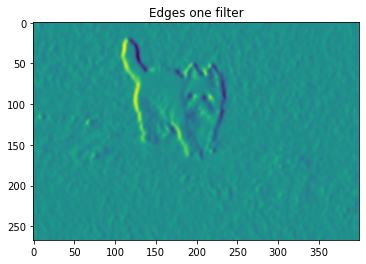

In [5]:
# Your code here!
######################### Solution code #########################
def GaussianEdge(size, σ):
    gauss_x = np.zeros([size,size])
    bias = (size-1)/2
    v = σ**2
    for i in range(size):
        for j in range(size):
            gauss_x[i,j] = (-(j-bias)/(2*np.pi*v*v))*np.exp(-((i-bias)**2 + (j-bias)**2)/(2*v))
    return gauss_x
Gx = GaussianEdge(11,2)
im_blur, _ = blurryImage(im)
######################### End solution code #########################
plt.figure()
plt.title('Gx')
plt.imshow(Gx)

plt.figure()
plt.title('Edges two filters')
Ix = scipy.ndimage.convolve(im_blur, dx)
plt.imshow(Ix)

plt.figure()
plt.title('Edges one filter')
plt.imshow(scipy.ndimage.convolve(im, Gx))

print(np.abs(np.sum(im_blur - im)))

print(np.abs(scipy.ndimage.convolve(im_blur, dx)[15:-15,15:-15] - scipy.ndimage.convolve(im, Gx)[15:-15,15:-15]).mean())

# Problem 1.2 Pet edge detection (e)
Please visualize the results using matplotlib.

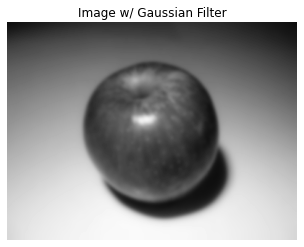

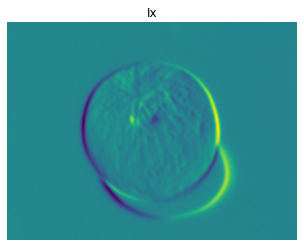

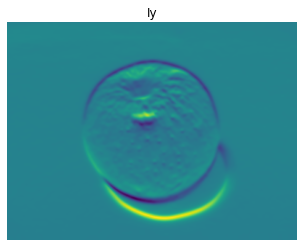

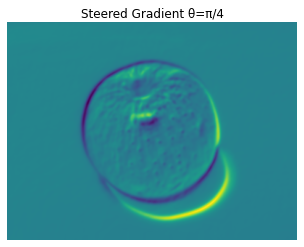

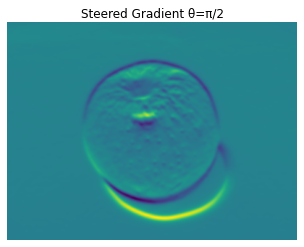

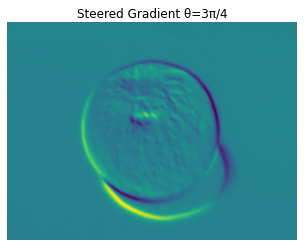

In [6]:
im = imageio.v2.imread('apple.jpg').mean(2)/255.
gaussianImage, _ = blurryImage(im)

# Your code here!
######################### Solution code #########################
def oriented_grad(Ix,Iy,θ):
    ux = np.cos(θ)
    uy = np.sin(θ)
    im = ux*Ix + uy*Iy
    return im

plt.figure()
plt.axis('off')
plt.title('Image w/ Gaussian Filter')
plt.imshow(gaussianImage, cmap = 'gray', vmin = 0, vmax = 1)

Ix = scipy.ndimage.convolve(gaussianImage,[[1,-1]])
Iy = scipy.ndimage.convolve(gaussianImage,[[1],[-1]])

plt.figure()
plt.axis('off')
plt.title('Ix')
plt.imshow(Ix)
plt.figure()
plt.axis('off')
plt.title('Iy')
plt.imshow(Iy)


steer45 = oriented_grad(Ix,Iy,np.pi/4)
plt.figure()
plt.axis('off')
plt.title('Steered Gradient θ=π/4')
plt.imshow(steer45)

steer90 = oriented_grad(Ix,Iy,np.pi/2)
plt.figure()
plt.axis('off')
plt.title('Steered Gradient θ=π/2')
plt.imshow(steer90)

steer135 = oriented_grad(Ix,Iy,(3*np.pi)/4)
plt.figure()
plt.axis('off')
plt.title('Steered Gradient θ=3π/4')
plt.imshow(steer135)

######################### End solution code #########################